In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv('scaled data/real_estate_scaled_data.csv')
data.drop(columns='Unnamed: 0',axis=1,inplace=True)
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,No
0,0.272926,0.730594,0.020085,1.0,0.694529,0.597905,0.459091,1
1,0.272926,0.445205,0.092499,0.9,0.640838,0.584253,0.524242,2
2,1.000000,0.303653,0.175911,0.5,0.785642,0.666542,0.601515,3
3,0.909389,0.303653,0.175911,0.5,0.785642,0.666542,0.715152,4
4,0.181223,0.114155,0.119925,0.5,0.621110,0.639237,0.537879,5


<AxesSubplot:>

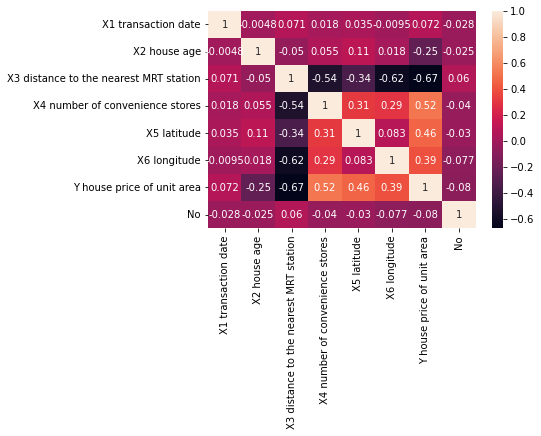

In [48]:
sns.heatmap(data.corr(),annot=True)

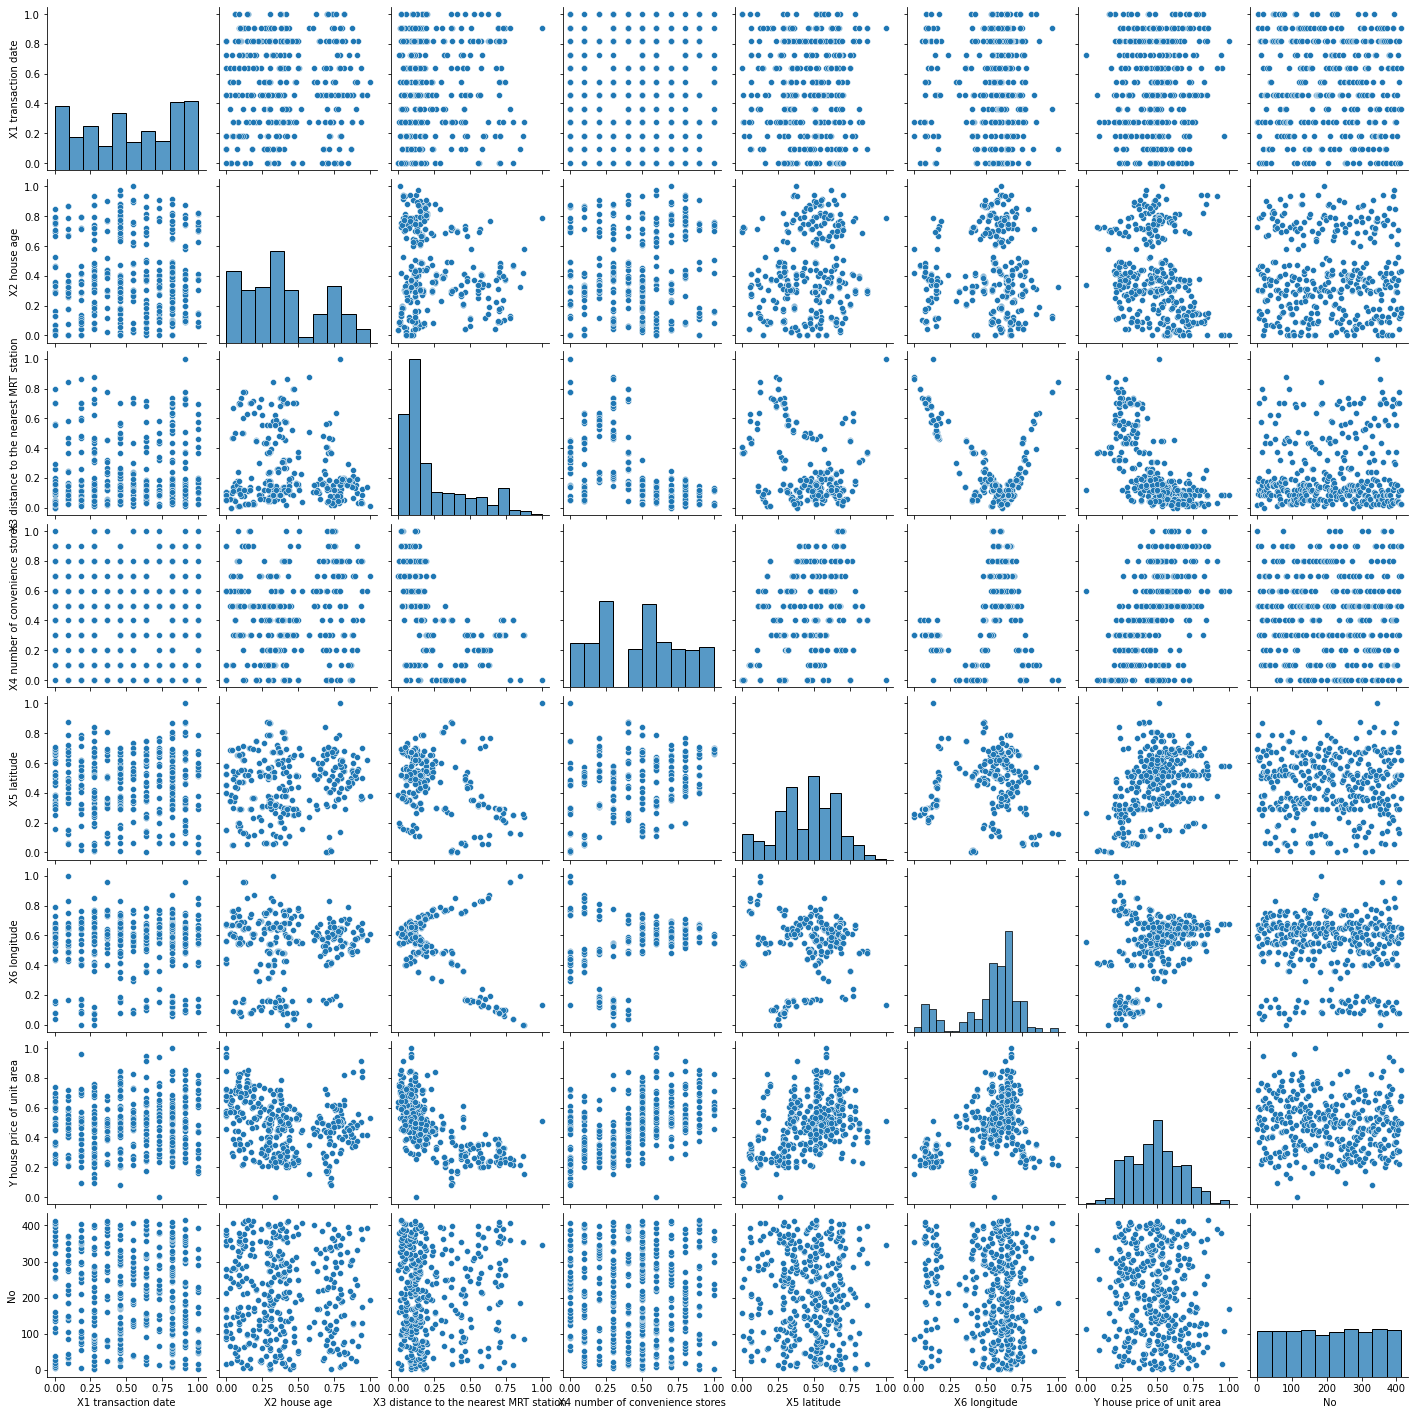

In [49]:
sns.pairplot(data)

# Splitting Data

In [6]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-2]
y = data['Y house price of unit area']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

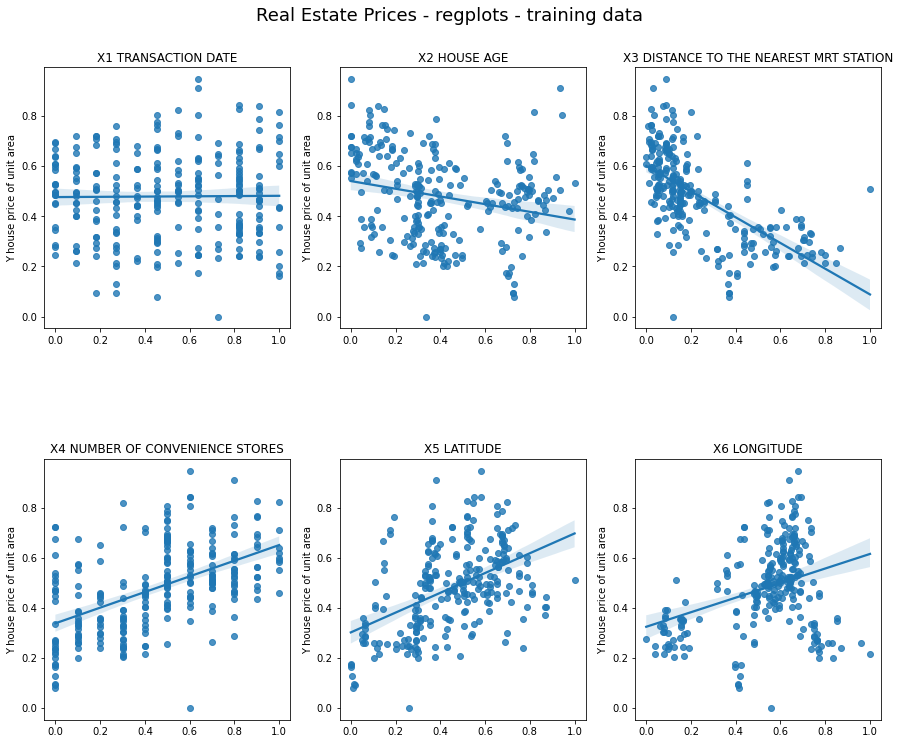

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Real Estate Prices - regplots - training data", fontsize=18, y=0.95)

for col, ax in zip(x_train.columns.to_list(), axs.ravel()):
    sns.regplot(x_train[col],y_train,ax=ax)

    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()

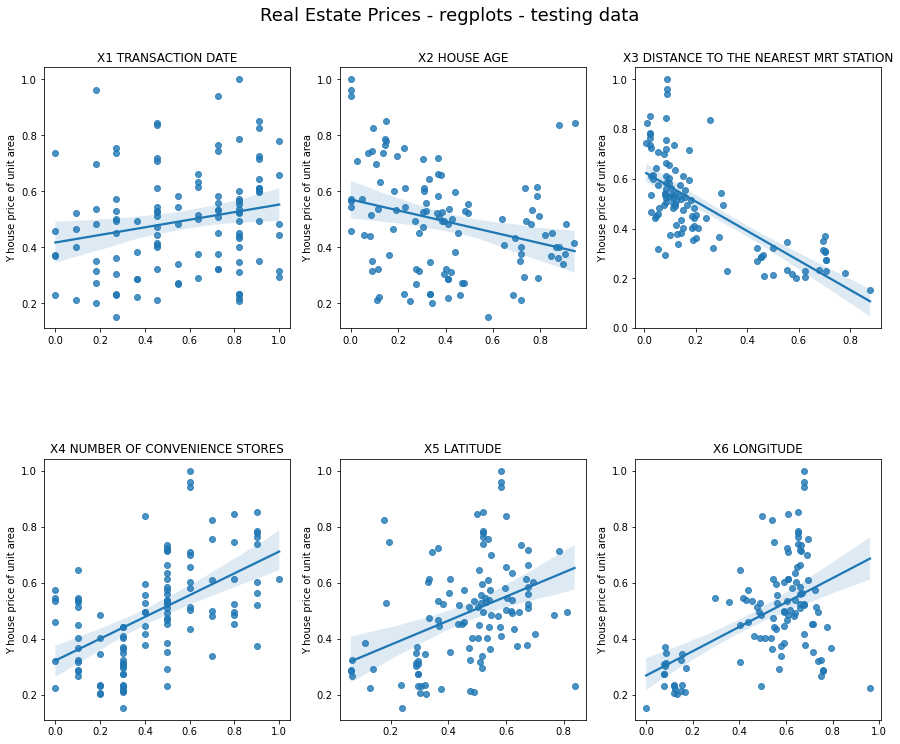

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Real Estate Prices - regplots - testing data", fontsize=18, y=0.95)

for col, ax in zip(x_test.columns.to_list(), axs.ravel()):
    sns.regplot(x_test[col],y_test,ax=ax)

    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.640315548041636

In [27]:
from sklearn import metrics
y_pred = reg.predict(x_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ValueError: continuous is not supported

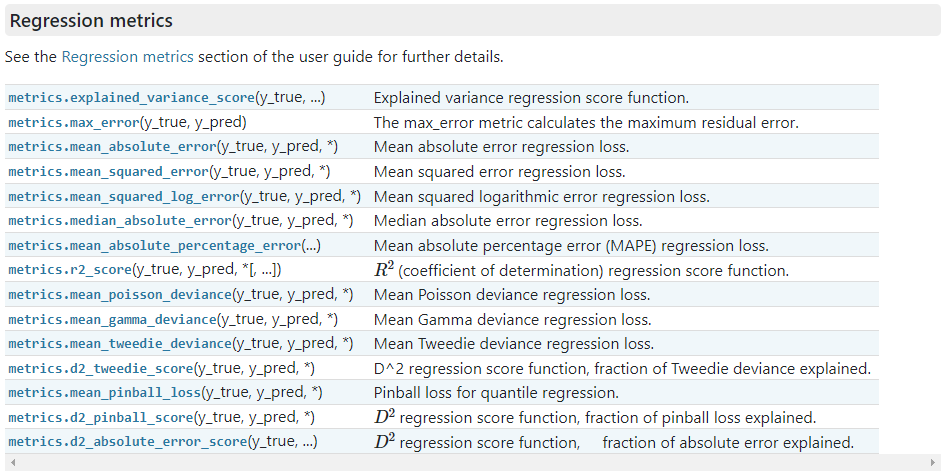
<center> OK this is terrifying!!! </center>

In [43]:
from sklearn import metrics
y_pred = reg.predict(x_test)
print("ACCURACY OF THE MODEL: ", metrics.explained_variance_score(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", metrics.max_error(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", metrics.mean_absolute_error(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", metrics.mean_squared_error(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", metrics.mean_squared_log_error(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", metrics.median_absolute_error(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", metrics.mean_poisson_deviance(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", metrics.mean_absolute_percentage_error(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", metrics.r2_score(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", metrics.mean_gamma_deviance(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", metrics.mean_pinball_loss(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", metrics.d2_absolute_error_score(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", metrics.d2_pinball_score(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", metrics.d2_tweedie_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.6411774966187223
ACCURACY OF THE MODEL:  0.4393641568638704
ACCURACY OF THE MODEL:  0.08443278402516251
ACCURACY OF THE MODEL:  0.012297112115477326
ACCURACY OF THE MODEL:  0.005053870912200689
ACCURACY OF THE MODEL:  0.06846563849454256
ACCURACY OF THE MODEL:  0.023725662784635622
ACCURACY OF THE MODEL:  0.18653811955799807
ACCURACY OF THE MODEL:  0.6409734361758904
ACCURACY OF THE MODEL:  0.05209659012555324
ACCURACY OF THE MODEL:  0.042216392012581254
ACCURACY OF THE MODEL:  0.4271435158201
ACCURACY OF THE MODEL:  0.4271435158201
ACCURACY OF THE MODEL:  0.6409734361758904


<AxesSubplot:xlabel='Y house price of unit area'>

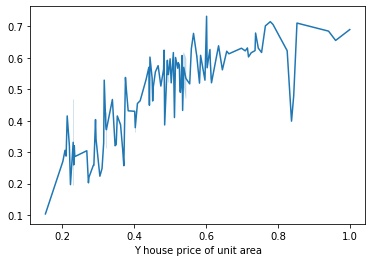

In [51]:
sns.lineplot(x=y_test,y=y_pred)